# Demo1: Decision Tree - Classification

Diabetes is one of the deadliest diseases in the world. It is not only a disease but also a creator of different kinds of diseases like heart attack, blindness, etc. 

The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. 

So, it is important to identify whether the patient has diabetes or not based on diagnostic measurements. 

#### Dataset Used: The dataset used has been obtained from UCI Machine Learning Repository having 769 records of Female Patients exclusively. Dataset is downloaded from Kaggle https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1


## Import Data & Python Packages

In [80]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [81]:
# load dataset
pima = pd.read_csv("./diabetes.csv")
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Data Exploration

In [82]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [83]:
#explore the numeric data types
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [84]:
#average numbers for all columns
pima.groupby('label').mean()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## 2. Preparation of Data

In [85]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [86]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## 3. Modelling - Decision Tree Classifier

In [87]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## 4. Evaluation

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[127,  19],
       [ 37,  48]], dtype=int64)

In [57]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.7575757575757576
recall: 0.7575757575757576
f1-score: 0.750259813757267
precision: 0.7164179104477612


## 5. Visualization

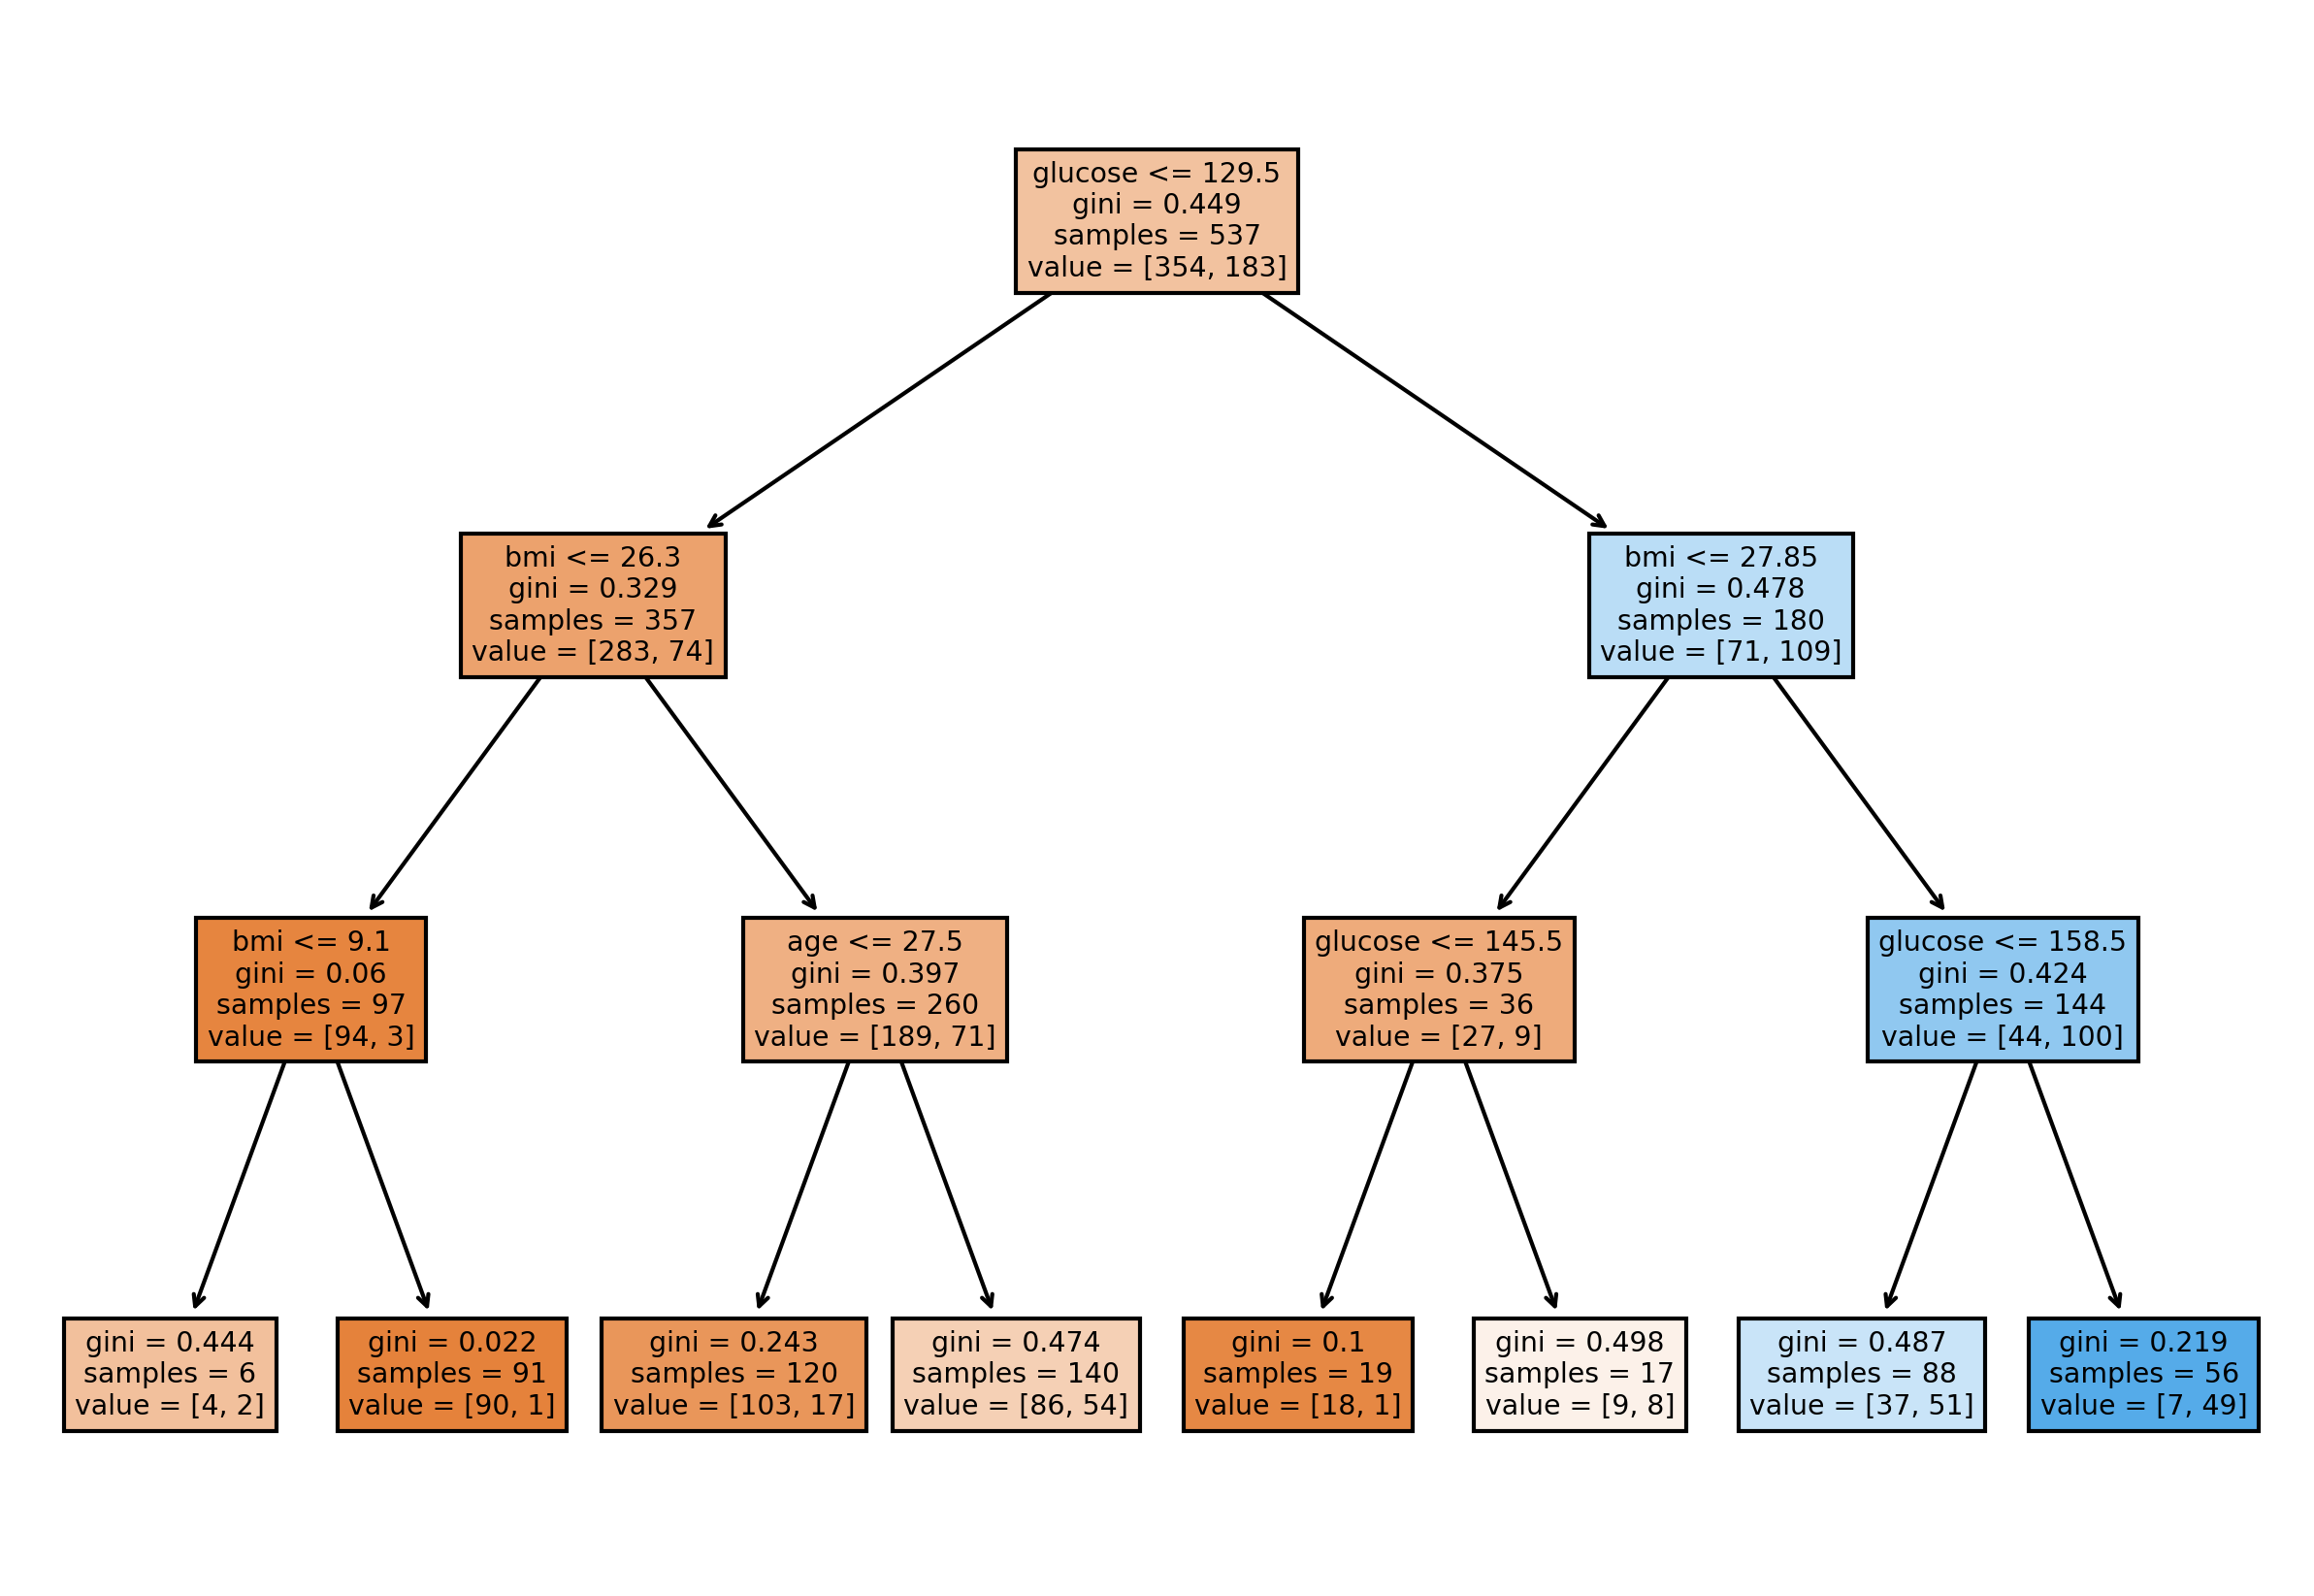

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=300)

tree.plot_tree(clf,
           feature_names = feature_cols, 
           filled = True);

fig.savefig('Diabetes_Tree.png')

In [60]:
# [354,183] = [0,1]
# where , "0" = Non-Diabetic & "1" = Diabetic

[Text(0.5, 0.875, 'X[4] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'X[2] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.125, 0.375, 'X[2] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'gini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.375, 0.375, 'X[3] <= 27.5\ngini = 0.397\nsamples = 260\nvalue = [189, 71]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 120\nvalue = [103, 17]'),
 Text(0.4375, 0.125, 'gini = 0.474\nsamples = 140\nvalue = [86, 54]'),
 Text(0.75, 0.625, 'X[2] <= 27.85\ngini = 0.478\nsamples = 180\nvalue = [71, 109]'),
 Text(0.625, 0.375, 'X[4] <= 145.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.5625, 0.125, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.875, 0.375, 'X[4] <= 158.5\ngini = 0.424\nsamples = 144\nvalue = [44, 100]')

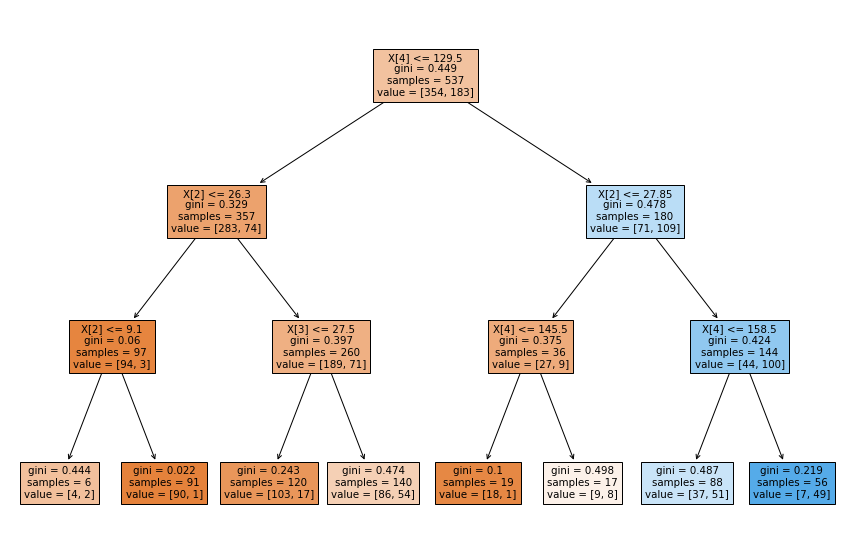

In [61]:
# alternate...
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

# ---------------------------------------------------------------------------------------------------------------

# Demo2: Decision Tree Regressor

The bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of the week, season, the hour of the day, etc. can affect the rental behaviors. 

The owner of a bike-sharing company wants to know how many bikes are going to be rented per hour. Try to predict the bike rental count hourly based on the environmental and seasonal settings while using a Decision Tree Regressor.

The dataset is available on Kaggle: https://www.kaggle.com/marklvl/bike-sharing-dataset



## Import libraries

In [62]:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns



## Loading Data

In [65]:
hour_df = pd.read_csv("bike-sharing-hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1. Data Exploration

In [66]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [67]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 2. Preprocessing

In [68]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

###########################
# Setting proper data types
###########################
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [69]:
# check missing values in train data
hour_df[hour_df.isnull().any(axis=1)]

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count


* ##### No missing data

In [70]:
# detect correlations
column_correlation = hour_df.corr()
column_correlation

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


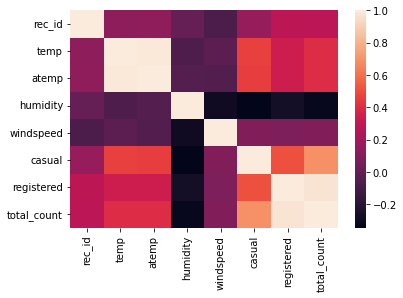

In [71]:
import seaborn as sns

sns.heatmap(column_correlation);
plt.show()

## 3. Data Preparation - Feature Engineering

### Creation of dummy variables: Convert categorical data to numbers

In [72]:
# Encoding all the categorical features
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']


In [73]:
#Encoding season
season_dummies = pd.get_dummies(hour_df.season, prefix="season")
df_with_dummies = pd.concat([hour_df,season_dummies],axis='columns')
df_with_dummies.drop('season',axis='columns',inplace=True)
# is_holiday
is_holiday_dummies = pd.get_dummies(hour_df.is_holiday, prefix="is_holiday")
df_with_dummies = pd.concat([df_with_dummies,is_holiday_dummies],axis='columns')
df_with_dummies.drop('is_holiday',axis='columns',inplace=True)
# weather_condition
weather_condition_dummies = pd.get_dummies(hour_df.weather_condition, prefix="weather_condition")
df_with_dummies = pd.concat([df_with_dummies,weather_condition_dummies],axis='columns')
df_with_dummies.drop('weather_condition',axis='columns',inplace=True)
# is_workingday
is_workingday_dummies = pd.get_dummies(hour_df.is_workingday, prefix="is_workingday")
df_with_dummies = pd.concat([df_with_dummies,is_workingday_dummies],axis='columns')
df_with_dummies.drop('is_workingday',axis='columns',inplace=True)
# hour
hour_dummies = pd.get_dummies(hour_df.hour, prefix="hour")
df_with_dummies = pd.concat([df_with_dummies,hour_dummies],axis='columns')
df_with_dummies.drop('hour',axis='columns',inplace=True)
# weekday
weekday_dummies = pd.get_dummies(hour_df.weekday, prefix="weekday")
df_with_dummies = pd.concat([df_with_dummies,weekday_dummies],axis='columns')
df_with_dummies.drop('weekday',axis='columns',inplace=True)
# month
month_dummies = pd.get_dummies(hour_df.month, prefix="month")
df_with_dummies = pd.concat([df_with_dummies,month_dummies],axis='columns')
df_with_dummies.drop('month',axis='columns',inplace=True)
# year
year_dummies = pd.get_dummies(hour_df.year, prefix="year")
df_with_dummies = pd.concat([df_with_dummies,year_dummies],axis='columns')
df_with_dummies.drop('year',axis='columns',inplace=True)
df_with_dummies.head()


,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count,season_1,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_0,year_1
0,1,2011-01-01,0.24,0.2879,0.81,0.0,3,13,16,1,...,0,0,0,0,0,0,0,0,1,0
1,2,2011-01-01,0.22,0.2727,0.80,0.0,8,32,40,1,...,0,0,0,0,0,0,0,0,1,0
2,3,2011-01-01,0.22,0.2727,0.80,0.0,5,27,32,1,...,0,0,0,0,0,0,0,0,1,0
3,4,2011-01-01,0.24,0.2879,0.75,0.0,3,10,13,1,...,0,0,0,0,0,0,0,0,1,0
4,5,2011-01-01,0.24,0.2879,0.75,0.0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [74]:
X = df_with_dummies
X.head()
y=hour_df.total_count

In [75]:
X.drop('datetime', axis='columns', inplace=True)


In [76]:
# Divide the dataset into training and testing sets
df_train, df_test = train_test_split(X, train_size=0.7)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (12165, 65)
Size of test dataset:  (5214, 65)


In [77]:
X_train = df_train.drop(columns='total_count', axis =1)
y_train = df_train['total_count']
X_test = df_test.drop(columns='total_count', axis =1)
y_test = df_test['total_count']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12165, 64), (12165,), (5214, 64), (5214,))

## 4. Modeling

In [78]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.9565793566490688
R-Squaredon test dataset=0.9596696328750242


## 5. Visualization

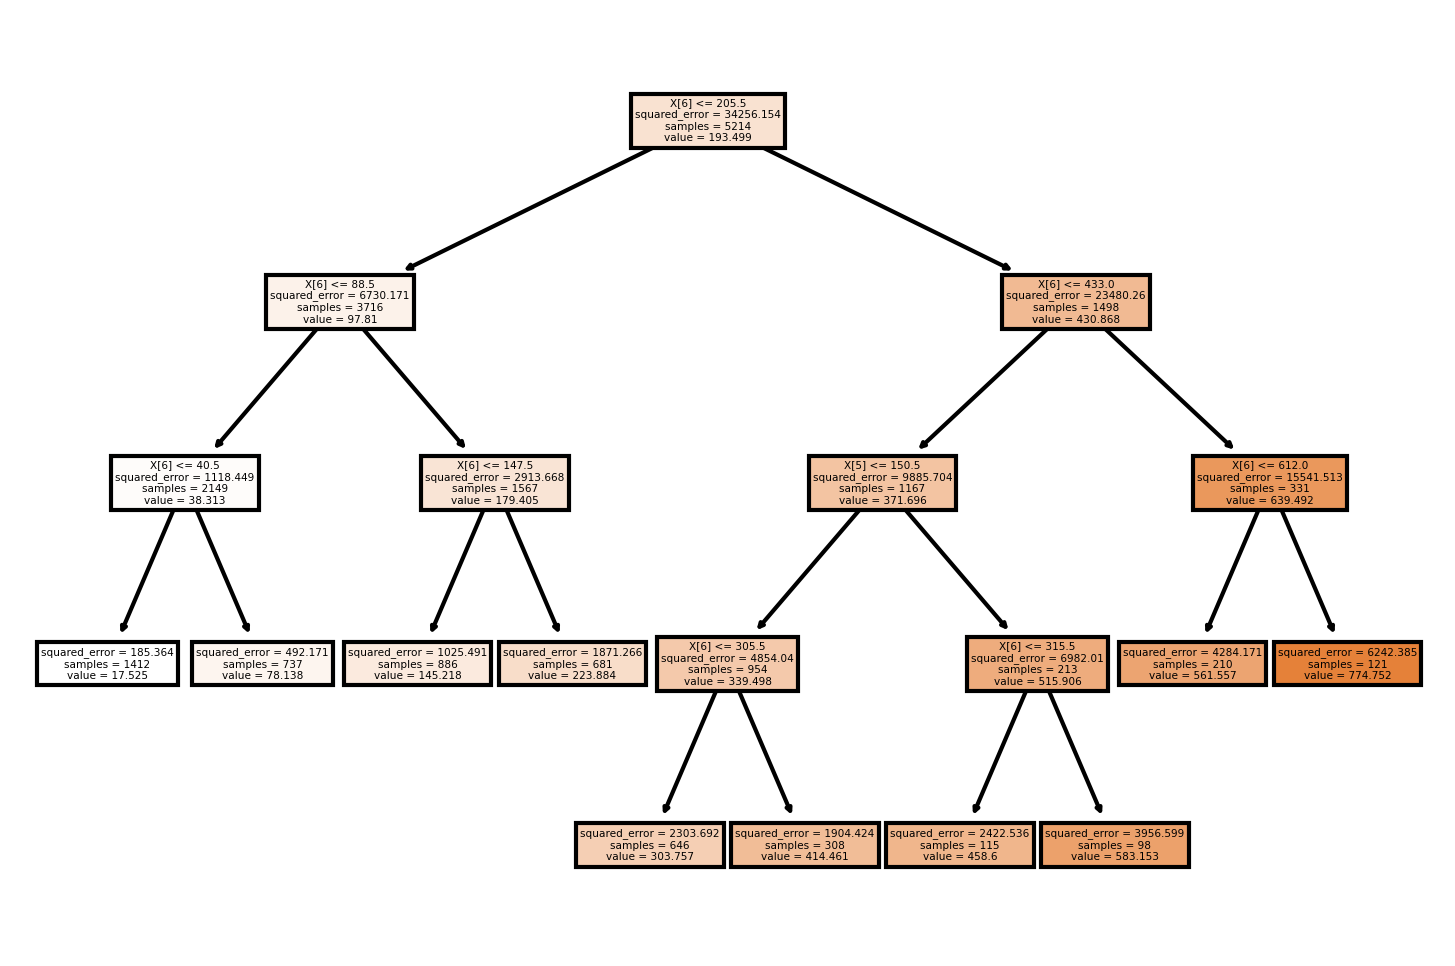

In [79]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')